In [ ]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from google.colab import files
uploaded = files.upload()

Saving housing_merge.csv to housing_merge.csv


In [ ]:
# Read the housing_merge.csv
housing_df = pd.read_csv("housing_merge.csv")
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,...,total_pop,avg_income,city,population,violent_crime,robbery,prop_crime,burglary,vehicle_theft,crime_rate_per_capita
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,1955,...,13220,68004.765507,Seattle,"721,365",183.1,210.02,2209.8,"1,081.98",503.21,0.013850
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,1951,...,21760,89057.812500,Seattle,"721,365",183.1,210.02,2209.8,"1,081.98",503.21,0.008415
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,1965,...,8840,142535.067873,Seattle,"721,365",183.1,210.02,2209.8,"1,081.98",503.21,0.020713
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,1987,...,12680,236032.492114,Sammamish,"47,158",33.9,2.10,727.3,231.1,27.60,0.002674
4,1225000.0,4,4.50,5420,101930,1.0,0,0,3,2001,...,10030,207522.133599,Redmond,"55,770",64.6,19.70,2137.3,308.4,87.90,0.006441


In [ ]:
# One-Hot Encoding for the 'city', 'zipcode" column
df_encoded = pd.get_dummies(housing_df, columns=['city', 'zipcode'])

print(df_encoded)

           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       231300.0         2       1.00         1180      5650     1.0   
1       538000.0         3       2.25         2570      7242     2.0   
2       604000.0         4       3.00         1960      5000     1.0   
3       510000.0         3       2.00         1680      8080     1.0   
4      1225000.0         4       4.50         5420    101930     1.0   
...          ...       ...        ...          ...       ...     ...   
19945   475000.0         3       2.50         1310      1294     2.0   
19946   360000.0         3       2.50         1530      1131     3.0   
19947   400000.0         4       2.50         2310      5813     2.0   
19948   402101.0         2       0.75         1020      1350     2.0   
19949   325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  yr_built  ...  zipcode_98146  \
0               0     0          3      1955  ...          False   

In [ ]:
df_encoded.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'yr_built', 'total_pop',
       'avg_income', 'population', 'violent_crime', 'robbery', 'prop_crime',
       'burglary', 'vehicle_theft', 'crime_rate_per_capita', 'city_Auburn',
       'city_Bellevue', 'city_Federal Way', 'city_Kent', 'city_Kirkland',
       'city_Redmond', 'city_Renton', 'city_Sammamish', 'city_Seattle',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98023', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98042', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98074', 'zipcode_98075', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcod

In [ ]:
# Drop rows with missing values
df_encoded.dropna(inplace=True)

In [ ]:
# Convert 'population' and 'burglary' columns to numeric
df_encoded['population'] = pd.to_numeric(df_encoded['population'], errors='coerce')
df_encoded['burglary'] = pd.to_numeric(df_encoded['burglary'], errors='coerce')

In [ ]:
df_encoded.fillna(0, inplace=True)

In [ ]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_encoded["price"]

# Separate the X variable, the features
X = df_encoded.drop("price", axis=1)
feature_names = X.columns
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,total_pop,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,2,1.00,1180,5650,1.0,0,0,3,1955,13220,...,False,False,False,False,False,False,True,False,False,False
1,3,2.25,2570,7242,2.0,0,0,3,1951,21760,...,False,False,False,False,False,False,False,False,False,False
2,4,3.00,1960,5000,1.0,0,0,5,1965,8840,...,False,False,False,False,False,False,False,False,False,False
3,3,2.00,1680,8080,1.0,0,0,3,1987,12680,...,False,False,False,False,False,False,False,False,False,False
4,4,4.50,5420,101930,1.0,0,0,3,2001,10030,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing pipeline for handling categorical features (one-hot encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['city', 'zipcode']),  # OneHotEncoding for categorical variables
    ],
    remainder='passthrough'  # Keeps the rest of the numerical features like 'avg_income', 'burglary'
)

# Create a pipeline with preprocessing and regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
print(X_train.shape)

(14962, 80)


In [ ]:
# Before dropping NaN values
print("Before dropping NaN values:", X_train.shape)

Before dropping NaN values: (14962, 80)


In [ ]:
# Drop rows with NaN values if that's the approach you're using
X_train_dropped = X_train.dropna()
X_test_dropped = X_test.dropna()

In [ ]:
# Drop rows from y_train corresponding to the rows dropped from X_train
y_train_dropped = y_train[X_train_dropped.index]

# Drop rows from y_test corresponding to the rows dropped from X_test
y_test_dropped = y_test[X_test_dropped.index]

In [ ]:
# Drop rows with NaN from X_train, X_test and drop corresponding rows from y_train, y_test
X_train_dropped, y_train_dropped = X_train.dropna(), y_train[X_train.dropna().index]
X_test_dropped, y_test_dropped = X_test.dropna(), y_test[X_test.dropna().index]

In [ ]:
print(f"X_train_dropped shape: {X_train_dropped.shape}")
print(f"y_train_dropped shape: {y_train_dropped.shape}")
print(f"X_test_dropped shape: {X_test_dropped.shape}")
print(f"y_test_dropped shape: {y_test_dropped.shape}")

X_train_dropped shape: (14962, 80)
y_train_dropped shape: (14962,)
X_test_dropped shape: (4988, 80)
y_test_dropped shape: (4988,)


In [ ]:
# Check the shape after dropping rows
print("After dropping NaN values, X_train:", X_train_dropped.shape)
print("After dropping NaN values, X_test:", X_test_dropped.shape)
print("After dropping NaN values, y_train:", y_train_dropped.shape)
print("After dropping NaN values, y_test:", y_test_dropped.shape)

After dropping NaN values, X_train: (14962, 80)
After dropping NaN values, X_test: (4988, 80)
After dropping NaN values, y_train: (14962,)
After dropping NaN values, y_test: (4988,)


## Machine Learning: Create a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

model = LinearRegression()
# Fit the model to the training data
model.fit(X_train_dropped, y_train_dropped)

model.score(X_test_dropped, y_test_dropped)



0.7898636205826782

In [ ]:
# Predictions on the test set
predictions = model.predict(X_test_dropped)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_dropped, predictions)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test_dropped, predictions)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 31301096391.709072
R-squared: 0.7898636205826782


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78509312, 0.79833121, 0.80873748, 0.79538053, 0.78949021])

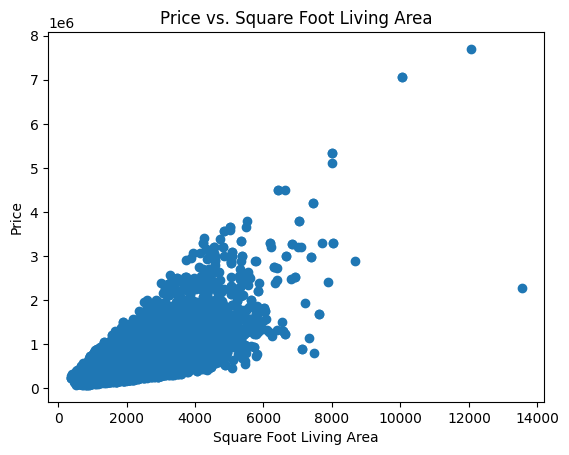

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of price vs. sqft_living
plt.scatter(df_encoded['sqft_living'], df_encoded['price'])
plt.xlabel('Square Foot Living Area')
plt.ylabel('Price')
plt.title('Price vs. Square Foot Living Area')
plt.show()

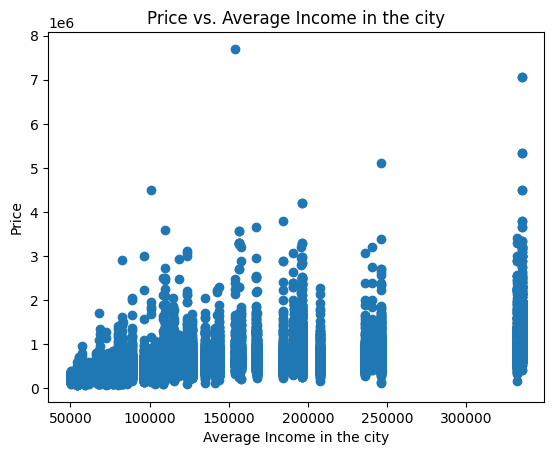

In [ ]:
# Scatter plot of price vs. avg_income
plt.scatter(df_encoded['avg_income'], df_encoded['price'])
plt.xlabel('Average Income in the city')
plt.ylabel('Price')
plt.title('Price vs. Average Income in the city')
plt.show()

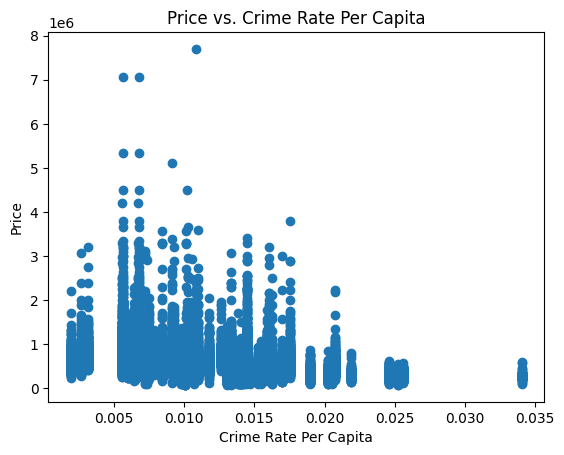

In [ ]:
# Scatter plot of price vs. crime_rate_per_capita
plt.scatter(df_encoded['crime_rate_per_capita'], df_encoded['price'])
plt.xlabel('Crime Rate Per Capita')
plt.ylabel('Price')
plt.title('Price vs. Crime Rate Per Capita')
plt.show()

In [ ]:
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.300156   0.522010     0.708554  0.106061  0.247592   
bedrooms       0.300156  1.000000   0.515391     0.572160  0.071594  0.154581   
bathrooms      0.522010  0.515391   1.000000     0.752226  0.100152  0.482451   
sqft_living    0.708554  0.572160   0.752226     1.000000  0.212553  0.337182   
sqft_lot       0.106061  0.071594   0.100152     0.212553  1.000000 -0.028321   
...                 ...       ...        ...          ...       ...       ...   
zipcode_98177  0.037430  0.000834   0.001889     0.032486  0.003545 -0.038693   
zipcode_98178 -0.071191 -0.010646  -0.053067    -0.041621 -0.015439 -0.058685   
zipcode_98188 -0.055753  0.003902  -0.023942    -0.023273 -0.004180 -0.035596   
zipcode_98198 -0.076028 -0.026017  -0.046153    -0.040969 -0.003830 -0.051909   
zipcode_98199  0.079828 -0.023798   0.013293     0.013944 -0.033758  0.001831   

               waterfront  

In [ ]:
import joblib
model_path = "optimized_predict_pricing.pkl"
joblib.dump(model, model_path)